In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread
from PIL import ImageEnhance
import PIL.Image
import numpy as np

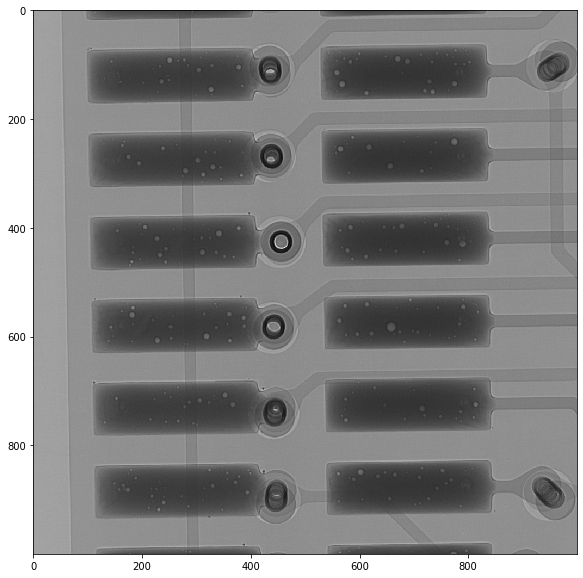

In [30]:
orig_img = plt.imread("voids02.tif")
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(orig_img,cmap = 'gray')

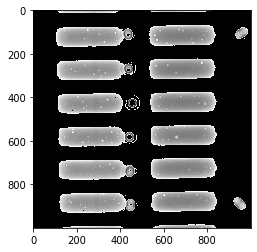

In [34]:
img_scaled = (orig_img/float(orig_img.max()))*255
img_scaled_int = img_scaled.astype('uint8')
blurred = cv2.blur(img_scaled_int, (5, 5))
ret, th1 = cv2.threshold(blurred, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_TOZERO_INV)
plt.imshow(th1, cmap = 'gray')
cntrs, heirarchy  = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
regions = []
for cntr in cntrs:
    x, y, w, h = cv2.boundingRect(cntr)
    if w*h > 5000:
        regions.append(cntr)

In [35]:
def getVoids(img):
    postcontrast = img * 2
#     postcontrast = cv2.cvtColor(postcontrast,cv2.COLOR_BGR2GRAY)
    cv2.imwrite("temp0.png", postcontrast)
    
    example_file2 = glob.glob("temp0.png")[0]
    im2 = imread(example_file2, as_grey=True)
    
    blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)
    # Compute radii in the 3rd column.
    blobs_log[:, 2] = blobs_log[:, 2]

    numrows = len(blobs_log)
    # print(blobs_log)
    print("Number of voids counted : " ,numrows)
    fig, ax = plt.subplots(1, 1)
    plt.imshow(im2, cmap=cm.gray)
    for blob in blobs_log:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
        ax.add_patch(c)
    return blobs_log,numrows

In [36]:
count = 0
for region in regions:
    (x, y, w, h) = cv2.boundingRect(region)
    cv2.imwrite("crop" + str(count) + ".png",img_scaled_int[y:y+h, x:x+w])
    count += 1

temp = cv2.imread('crop0.png')

Number of voids counted :  32
347.0 92.0


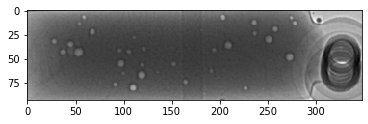

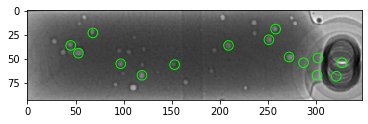

In [37]:
example_file2 = glob.glob("crop0.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  25
303.0 93.0


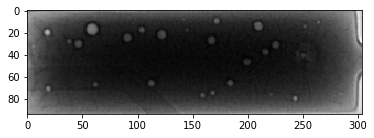

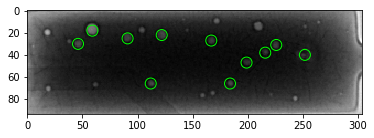

In [38]:
example_file2 = glob.glob("crop1.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  34
349.0 91.0


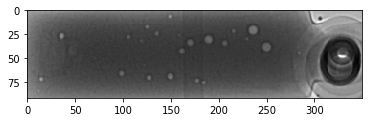

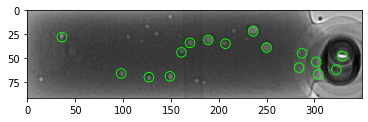

In [39]:
example_file2 = glob.glob("crop2.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  21
301.0 94.0


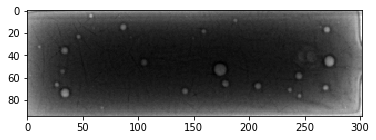

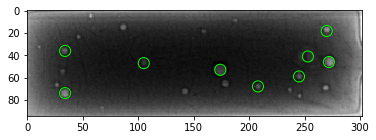

In [41]:
example_file2 = glob.glob("crop3.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  29
362.0 92.0


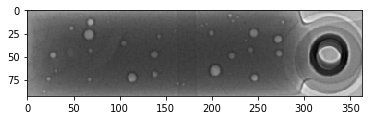

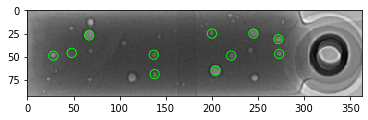

In [50]:
example_file2 = glob.glob("crop4.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=300, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  28
303.0 94.0


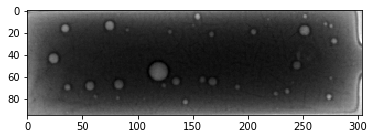

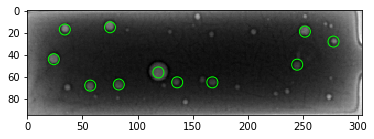

In [43]:
example_file2 = glob.glob("crop5.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  29
301.0 92.0


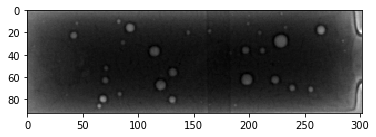

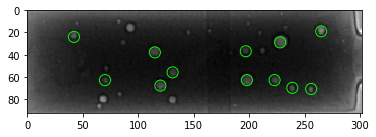

In [44]:
example_file2 = glob.glob("crop6.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  28
304.0 93.0


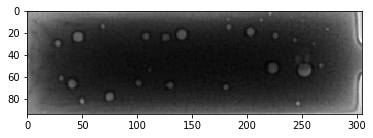

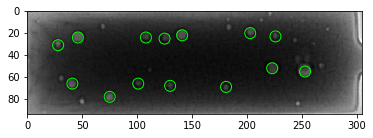

In [45]:
example_file2 = glob.glob("crop7.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  36
363.0 92.0


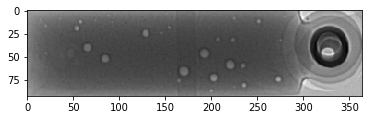

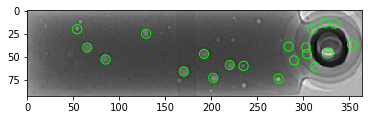

In [46]:
example_file2 = glob.glob("crop8.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  17
304.0 94.0


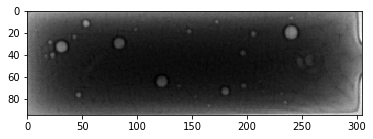

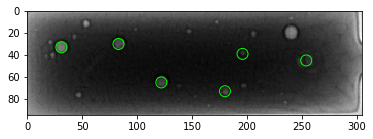

In [47]:
example_file2 = glob.glob("crop9.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  30
351.0 92.0


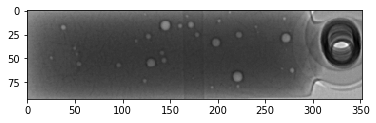

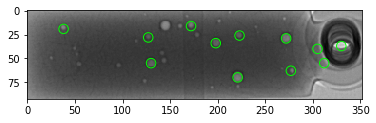

In [48]:
example_file2 = glob.glob("crop10.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)

Number of voids counted :  30
304.0 93.0


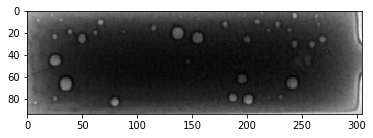

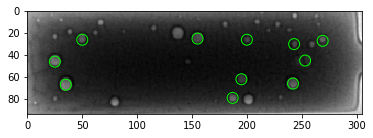

In [49]:
example_file2 = glob.glob("crop11.png")[0]
im2 = imread(example_file2, as_grey=True)
plt.imshow(im2, cmap=cm.gray)

blobs_log = blob_log(im2, min_sigma=5, max_sigma=200, num_sigma=100, threshold=.007)

blobs_log[:, 2] = blobs_log[:, 2]

numrows = len(blobs_log)

print("Number of voids counted : " ,numrows)

fig, ax = plt.subplots(1, 1)
plt.imshow(im2, cmap=cm.gray)

maxx = 0.0
maxy = 0.0

for blob in blobs_log:
    y, x, r = blob
    maxx = max(x, maxx)
    maxy = max(y, maxy)

print(maxx, maxy)

for blob in blobs_log:
    y, x, r = blob

    if(not(x==0 or y==0 or x==maxx or y==maxy)):
      c = plt.Circle((x, y), r, color='lime', linewidth=1, fill=False)
      ax.add_patch(c)